**Etivity 1 - Bank Data Set** 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/bank.csv")

**Questions**

- I would like to find out the most frequent job, marital status, and education. 
<br>
- I would like to find out what type of education the different job groups have?
<br>
- I would like to find out the distribution of the balance and other attributes.
<br>
- I would like to find out the distribution of the balance for clients with primary, secondary, and tertiary education.
<br>
- I would like to find out which clients has the highest balance and its background (e.g. education, marital status). 
<br>
- I would like to find out how many days it takes in average after the client was last contacted from a previous campaign. 
<br>
- I would like to find out how often clients have been contacted during the campaign.
<br>
- I would liek to find out about the outcome of the previous campaign.
<br>
- I would like to find out the contact duration in seconds.
<br>
- I would like to find out when subscriptions have been bought during the year and who bought subscriptions.

**Quick Data Exploration**

Get the dimensions of the data

In [3]:
df.shape

(2000, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


The dataset has 2000 data rows. It has both numerical and categorical attributes. The attributes age, balance, day, month, duration, pdays, and previous are numerical attributes.
The last attribute subscribed indicates whether the person is subscribed (yes) or not (no). This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes .

In [6]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

**Quick Examination of Numerical Attributes**

In [7]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Age has (2000 - 1988) 12 missing values. No values are missing for the attributes balance, day, duration, campaign, pdays, and previous. 
<br>
<br>Campaign and previous are rather a categorical attribute than a numerical attribute. 
<br>
<br>Since the mean (41.75) is greater than the median (38.00) for age, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (1413.66) is greater than the median (551.00) for balance, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (13.85) is greater than the median (12.00) for day, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (292.02) is greater than the median (236.00) for duration, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (1.91) is greater than the median (1.00) for campaign, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (2.56) is greater than the median (2.00) for previous, I assume that the frequency distribution is positively skewed. 
<br>
<br>Since the mean (168) is less than the median (182) for pdays, I assume that the frequency distribution is negatively skewed.

**Descriptive Statitics for Categorical Attributes**

In [8]:
df['job'].describe()

count           1990
unique            11
top       management
freq             461
Name: job, dtype: object

There are 1990 observations for the attribute job. There are 11 unique elements for the attribute job. The mode/ most frequent value is management. The frequency of the mode is 461.

In [9]:
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

Most of the clients are working in a management position.

In [10]:
df['job'].count()

1990

There are 10 missing values.

In [11]:
df['marital'].describe()

count        2000
unique          3
top       married
freq         1111
Name: marital, dtype: object

There are 2000 observations for the attribute marital. There are three unique elements for the attribute marital. The mode is married. The frequency of the mode is 1111.

In [12]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

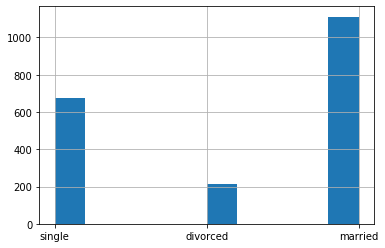

In [13]:
df.marital.hist()

Most of the clients are married followed by single and divorced.

In [14]:
df['marital'].count()

2000

There are no missing values.

In [15]:
df['education'].describe()

count          1896
unique            3
top       secondary
freq            995
Name: education, dtype: object

There are 1896 observations for the attribute education. There are three unique elements for the attribute education. The mode is secondary. The frequency of the mode is 995.

In [16]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

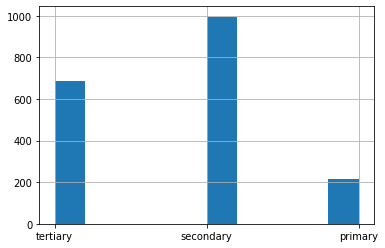

In [17]:
df.education.hist()

Most of the clients have a secondary education followed by tertiary education and primary education.

In [18]:
df['education'].count()

1896

There are 104 missing values for education.

In [19]:
df['housing'].describe()

count     2000
unique       2
top         no
freq      1037
Name: housing, dtype: object

There are 2000 observations for the attribute housing. There are two unique elements for the attribute housing. The mode is no. The frequency of the mode is 1037.

In [20]:
df['loan'].describe()

count     2000
unique       2
top         no
freq      1750
Name: loan, dtype: object

There are 2000 observations for the attribute loan There are two unique elements for the attribute loan. The mode is no. The frequency of the mode is 1750.

In [21]:
df['default'].describe()

count     2000
unique       2
top         no
freq      1985
Name: default, dtype: object

There are 2000 observations for the attribute default. There are two unique elements for the attribute default. The mode is no. The frequency of the mode is 1985.

In [22]:
df['contact'].describe()

count         1809
unique           2
top       cellular
freq          1663
Name: contact, dtype: object

There are 1809 observations for the attribute contact. There are two unique elements for the attribute contact. The mode is cellular. The frequency of the mode is 1663.

In [23]:
df['subscribed'].describe()

count     2000
unique       2
top        yes
freq      1000
Name: subscribed, dtype: object

There are 2000 observations for the attribute subscribed. There are two unique elements for the attribute contact. The mode is no. The frequency of the mode is 1000.

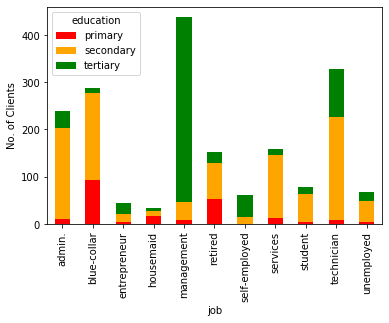

In [24]:
crosstab_JE = pd.crosstab(df['job'], df['education']) 
crosstab_JE.plot(kind='bar', stacked=True, color=['red', 'orange', 'green']) 
plt.ylabel('No. of Clients') 
plt.show()

- This table suggests that most of all managers have tertirary education.
<br>
- Admins, blue-collar, technicians, service workers, and unemployed persons have mostly secondary education.

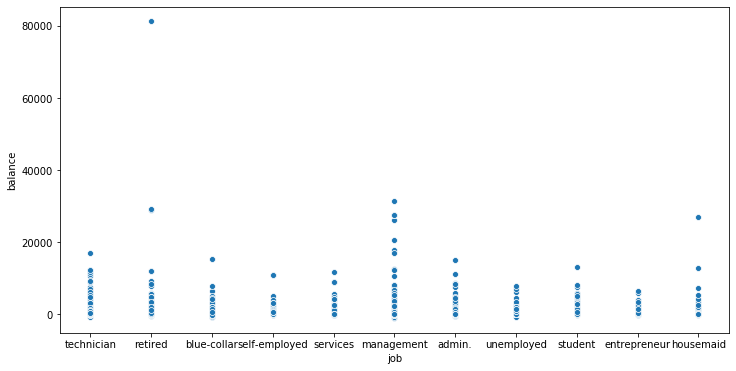

In [25]:
plt.figure(figsize = (12, 6));
sns.scatterplot(data=df, x='job', y='balance')
plt.show()

- Managers have the highest balance.
<br>
- After managers, technician, retired persons, and admins have the next highest balance.
<br>
- There are a couple of retired persons with higher balances. The most extreme balance for a retired person is 80000.
<br>
- Surprisingly, there is one housemaid that have almost the same balance as a manager.

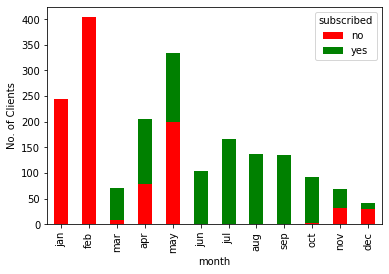

In [26]:
# Define a custom sorting order for the data to get it sorted by month name 
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12} 
crosstab_MS = pd.crosstab(df['month'], df['subscribed']) 
# Reorder the crosstab output by month 
month_sorted_crosstab = crosstab_MS.iloc[crosstab_MS.index.map(month_dict).argsort()] 
month_sorted_crosstab.plot(kind='bar', stacked=True, color=['red', 'green']) 
plt.ylabel('No. of Clients') 
plt.show() 

- This table suggests that subscriptions were bought most frequently between June and October.
<br>
- No subscriptions were bought in January and February.

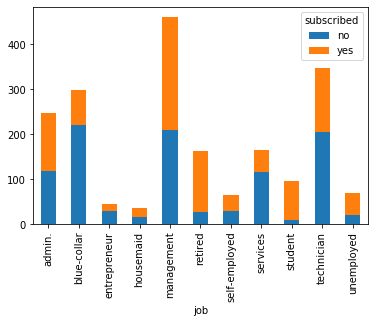

In [27]:
crosstab_1 = pd.crosstab(df['job'], df['subscribed'])
crosstab_1.plot(kind='bar', stacked=True)
plt.show() 

- Half of all managers and all self-employed have a subscription. 
<br>
- Little bit more than the half of all unemployed persons has a subscription. 
<br>
- More than the half of all entrepreneurs have a subscription. 
<br>
- Almost every retired person and every student have a subscription. 

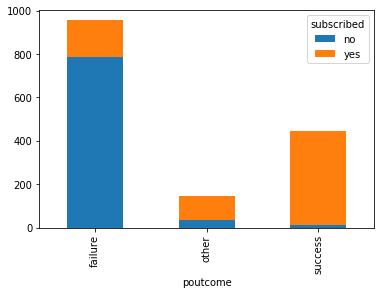

In [28]:
crosstab_1 = pd.crosstab(df['poutcome'], df['subscribed'])
crosstab_1.plot(kind='bar', stacked=True)
plt.show()

**The outcome of the previous marketing campaign**
<br>
- Success: Almost 500 (all have a subscription) 
- Failure: Almost 100 (from that 800 people don’t have a subscription and 80 people have a subscription) 
- Other: Almost 200 
<br>

**Conclusion**
<br>
- Previous campaign was successful with people with subscriptions.

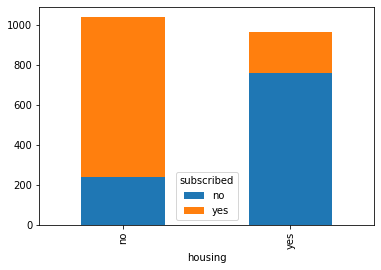

In [29]:
crosstab_1 = pd.crosstab(df['housing'], df['subscribed'])
crosstab_1.plot(kind='bar', stacked=True)
plt.show() 

- Almost 800 people who don’t have a subscription have a housing loan. 
<br>
- 100 people who have a subscription have a housing loan. 

**Descriptive Statistics for Numerical Attributes**

In [30]:
df.mean()

age           41.753018
balance     1413.663500
day           13.851500
duration     292.020500
campaign       1.909500
pdays        167.896000
previous       2.561500
dtype: float64

The average age is 41.75. 
<br>
<br>The average balance is 1413.66. 
<br>
<br>The average number of days is 13.85. 
<br>
<br>The average last contact duration in seconds is 292. 
<br>
<br>The average for the number of contacts performed during this campaign and for this client is 1.9. 
<br>
<br>average for the number of days that passed by after the client was last contacted from a previous campaign is 167.9.

In [31]:
df.median()

age          38.0
balance     551.0
day          12.0
duration    236.0
campaign      1.0
pdays       182.0
previous      2.0
dtype: float64

The median for age is 38. 
<br>
<br>The median for balance is 551.00. 
<br>
<br>The median for day is 12. 
<br>
<br>The median for last contact duration is 236. 
<br>
<br>The median for the number of contacts performed during this campaign and for this client is 1.0. 
<br>
<br>The median for the number of days that passed by after the client was last contacted from a previous campaign is 182.

In [32]:
df.std()

age           12.724358
balance     3131.224213
day            9.712189
duration     221.557295
campaign       1.378862
pdays        131.754126
previous       3.400735
dtype: float64

Balance has a high standard variation. Therefore, the balance values are spread out over a wide range. 
<br>
<br>Last contact duration and the number of days that passed by after the client was last contacted from a previous campaign also have a high standard variation.

**Distribution of Numerical Attributes**

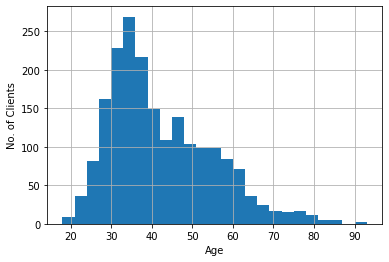

In [33]:
df['age'].hist(bins=25) 
plt.xlabel('Age') 
plt.ylabel('No. of Clients') 
plt.show() 

This is a skewed right histogram with a tail going off to the right. We see on the right side there are a few people whose ages are older than the rest. Most of the people were between late 20’s and 40 years of age. The last bars are what make the data have a shape that is skewed right. 
<br>
<br>There is a decline at pension age. 

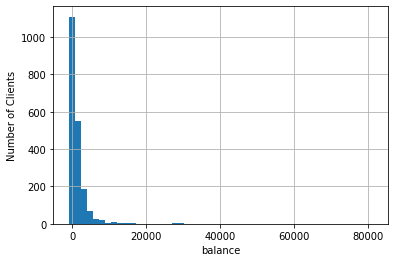

In [34]:
df['balance'].hist(bins=50)
plt.xlabel('balance')
plt.ylabel('Number of Clients')
plt.show()

There are some extreme values for balance. I will look at the scatter plot.

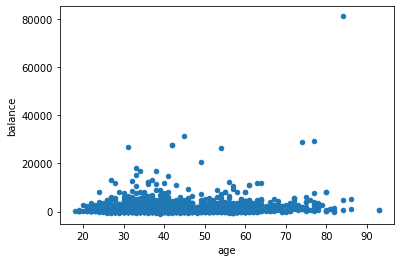

In [35]:
df.plot.scatter(x='age', y='balance') 
plt.show() 

There is a tiny uphill pattern moving between 20 and 30. Therefore, there is a very tiny positive relationship between age and balance. 
<br>
<br>Before 30, there is tiny downhill pattern. Therefore, there is a small negative relationship between age and balance. 
<br>
<br>There is a tiny downhill pattern before moving 50 years. Therefore, there is a small negative relationship between age and balance. 
<br>
<br>I will look at the box plot.

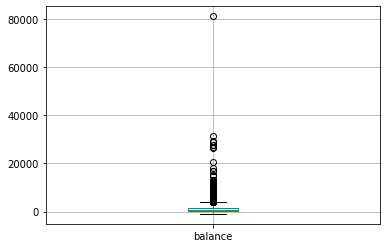

In [36]:
df.boxplot(column='balance')
plt.show()

There are outliers/extreme values. The most exteme value is a balance of 80000. I will group it by the categorical attribute education.

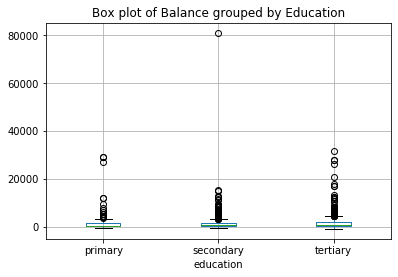

In [37]:
# Box plots of balance, grouped by the categorical attribute education
df.boxplot(column='balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

There is no difference between the mean balance of primary, secondary, and tertiary education. But there are extreme values. 
<br>
<br>There are clients with higher balances. The most extreme balance belongs to an account holder with secondary education.

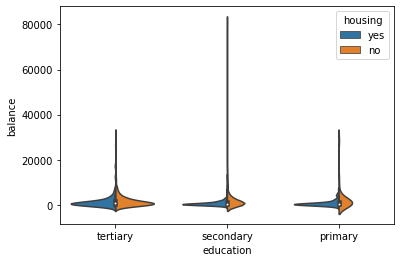

In [38]:
sns.violinplot(data=df, x='education', y='balance', hue='housing', split=True)
plt.show()

The plot suggests that clients with secondary education that have a housing loan have more even distribution of the balances than clients with tertiary and primary education that have a housing loan.
<br>
<br>I will split each violin plot by the binary attribute loan.

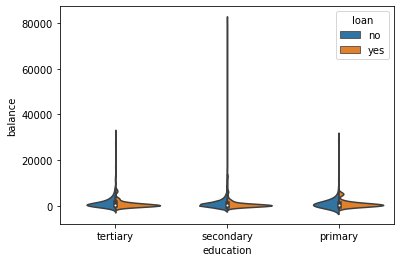

In [39]:
sns.violinplot(data=df, x='education', y='balance', hue='loan', split=True)
plt.show()

The plot suggests that clients with secondary education that doesn't have a personal loan have more even distribution of the balances than clients with tertiary and primary education.

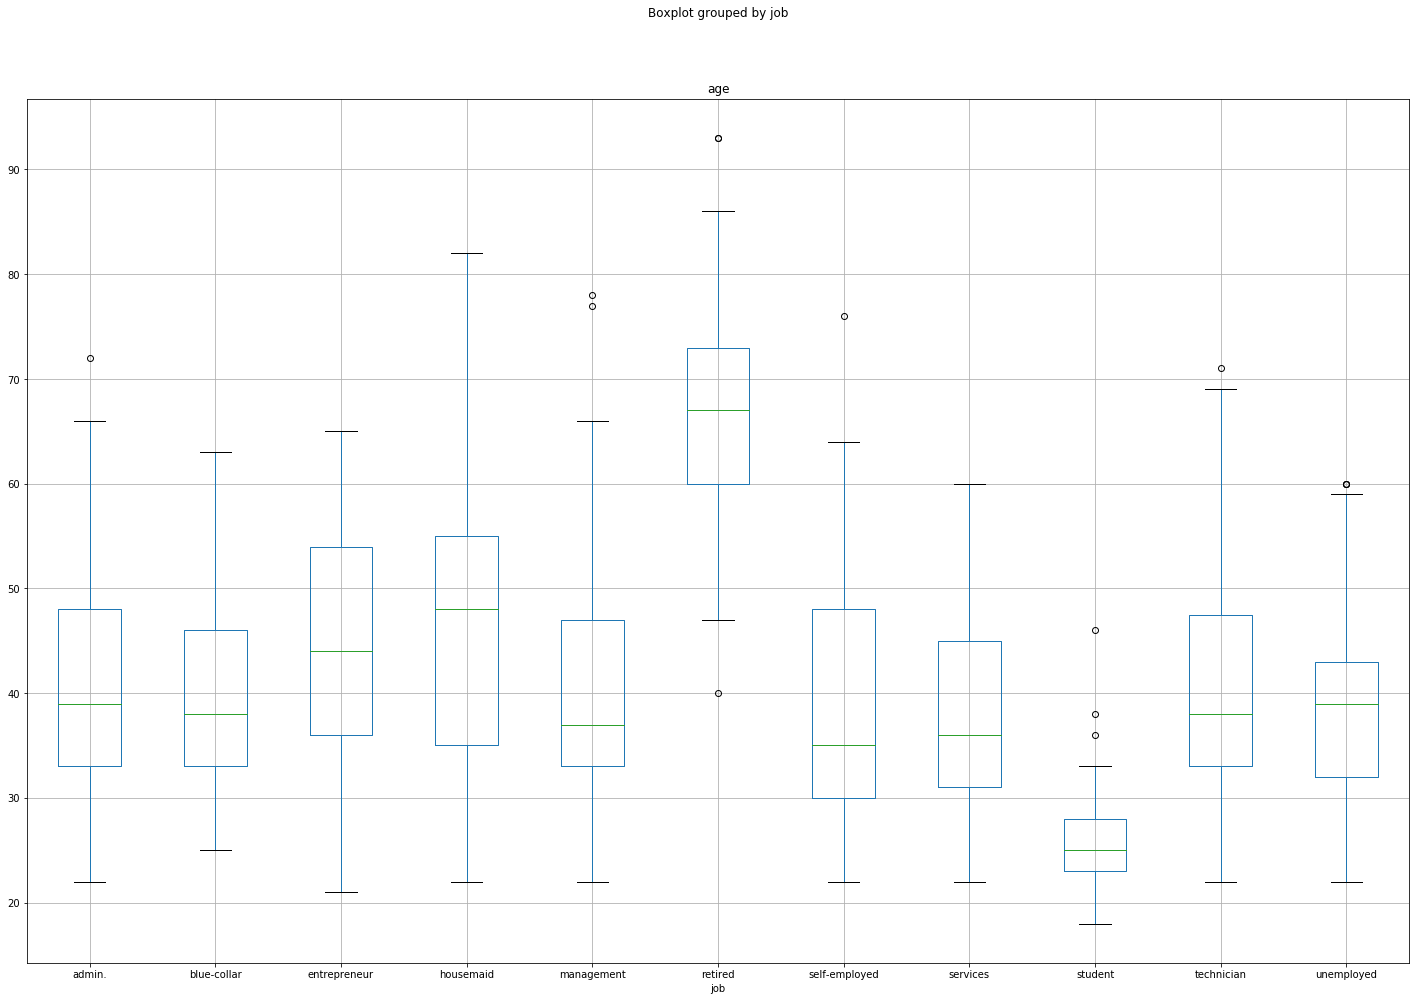

In [47]:
df.boxplot('age', by='job') 
default_fig_size = plt.rcParams['figure.figsize'] 
# Forcing it to be a larger plot. 
plt.rcParams['figure.figsize'] = (48.0, 32.0) 
plt.show() 

The ages of the various job groups are relatively consistent. Mostly the age is between 30 and 50. 
<br>For entrepreneurs and for housemaids the age is slightly different. Here the age is between 35 and 55.   
<br>The distribution of the retirees ranges from 40 to 95, roughly 55 years. Interestingly, there is one retiree with 40 years.
<br>In comparison, the distribution of the students only ranges from 18 (min value) to 35 (3rd quartile) to 55 (extreme values), roughly 37 years. 
<br>The distribution of the self-employed ranges from 22 (min value) to 64 years (max value) to 76 (max value), roughly 48 years. 
<br>The distribution of the service worker ranges from 22 (min value) to 60 (max value), roughly 38 years. 
<br>The distribution of the technician ranges from 22 (min value) to 70 (max value), roughly 48 years. 
<br>The distribution of the unemployed ranges from 22 (min value) to 60 (max value), roughly 38 years. 
<br>
<br>The median fluctuates: admin (39), blue-collar (38), entrepreneur (44), housemaid (48), management (37), self-employed (34), services (35), technician (38), unemployed (39). 
<br>
<br>The median not always cuts the box into two equal pieces. For house maid the longer part is below. Therefore, it is skewed left. That means the ages of the older housemaids are closer together than the ages of the younger housemaids.
<br>For management the longer part is right. Therefore, the data is skewed right. The same applies for self-employed and service. That means the ages of the younger management people are closer together than the ages of the older management people. That means the ages of the younger self-employed are closer together than the ages of the older self-employed. 
That means the ages of the younger service people are closer together than the ages of the older service people.
<br>For unemployed, the longer part is below. Therefore, it is skewed left. 
<br>
<br>Entrepreneur, retirees, and students are almost distributed symmetrically.  

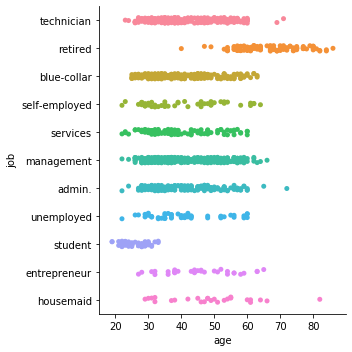

In [41]:
sns.catplot(x='age', y='job', data=df.dropna()) 

In the above plot the ages of clients is between 30 and 60. The age of the retires is between 40 and 80 age. The age of the students is between 20 and 30. 
<br>
<br>Interestingly, there is a housemaid in its eighties.

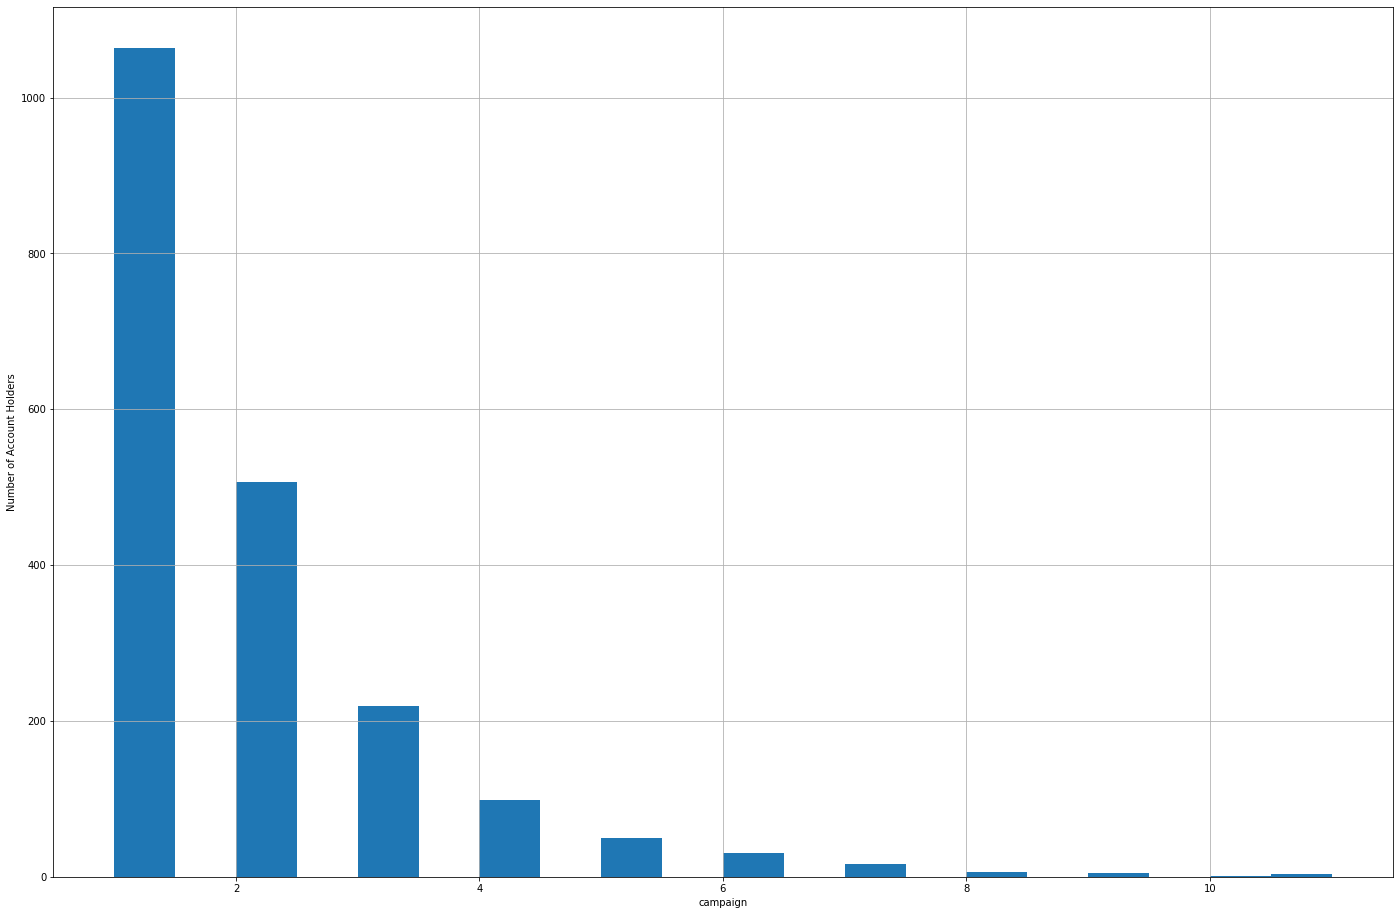

In [42]:
df['campaign'].hist(bins=20)
plt.xlabel("campaign")
plt.ylabel('Number of Account Holders')
plt.show()

Most of the clients have been contacted once during the campaign. There are few outliers. I will look at the box plot.

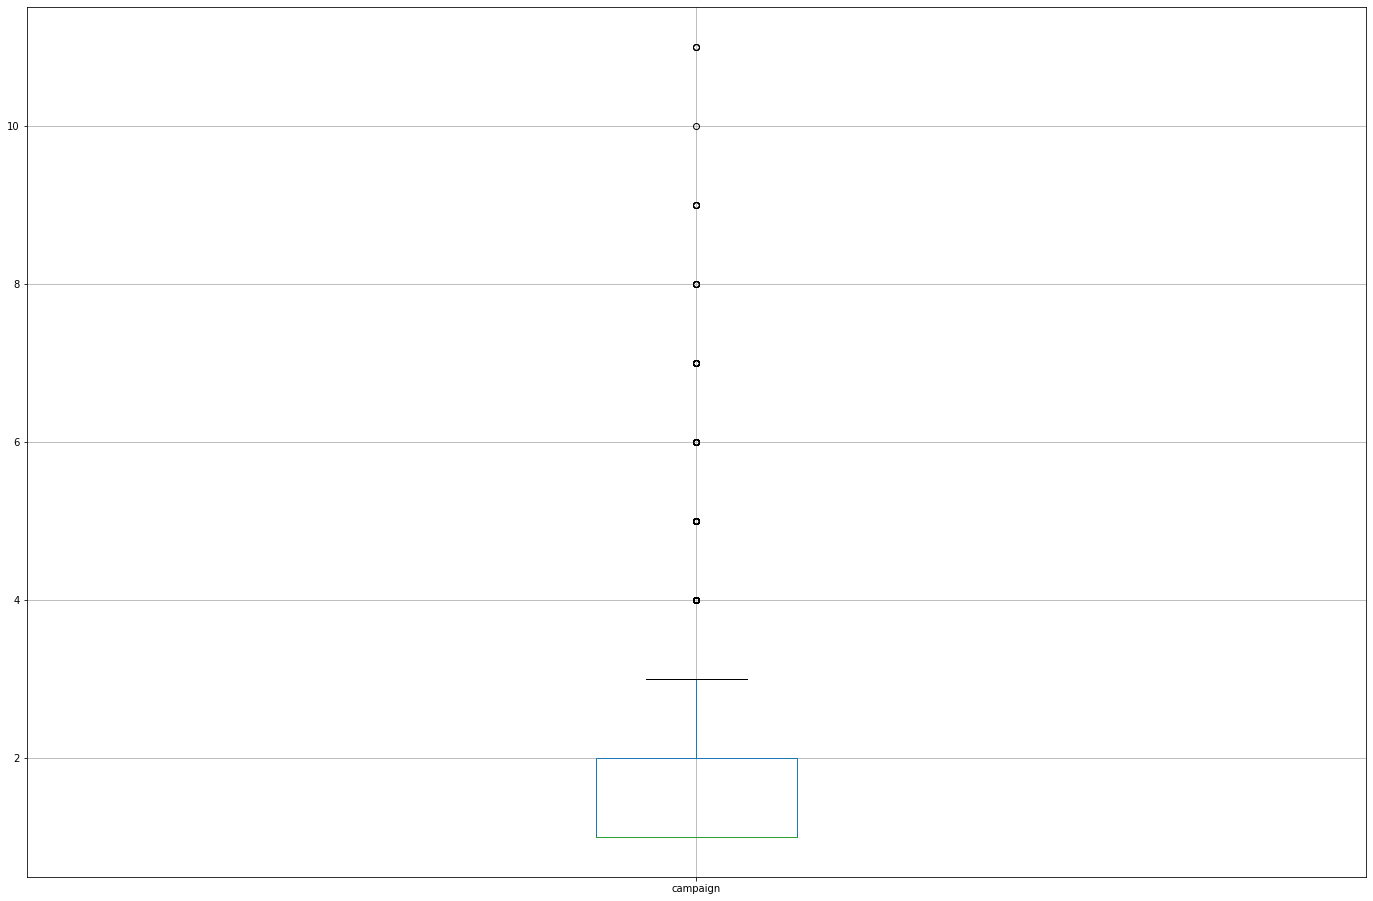

In [43]:
df.boxplot(column='campaign')
plt.show()

There are also some extreme values.

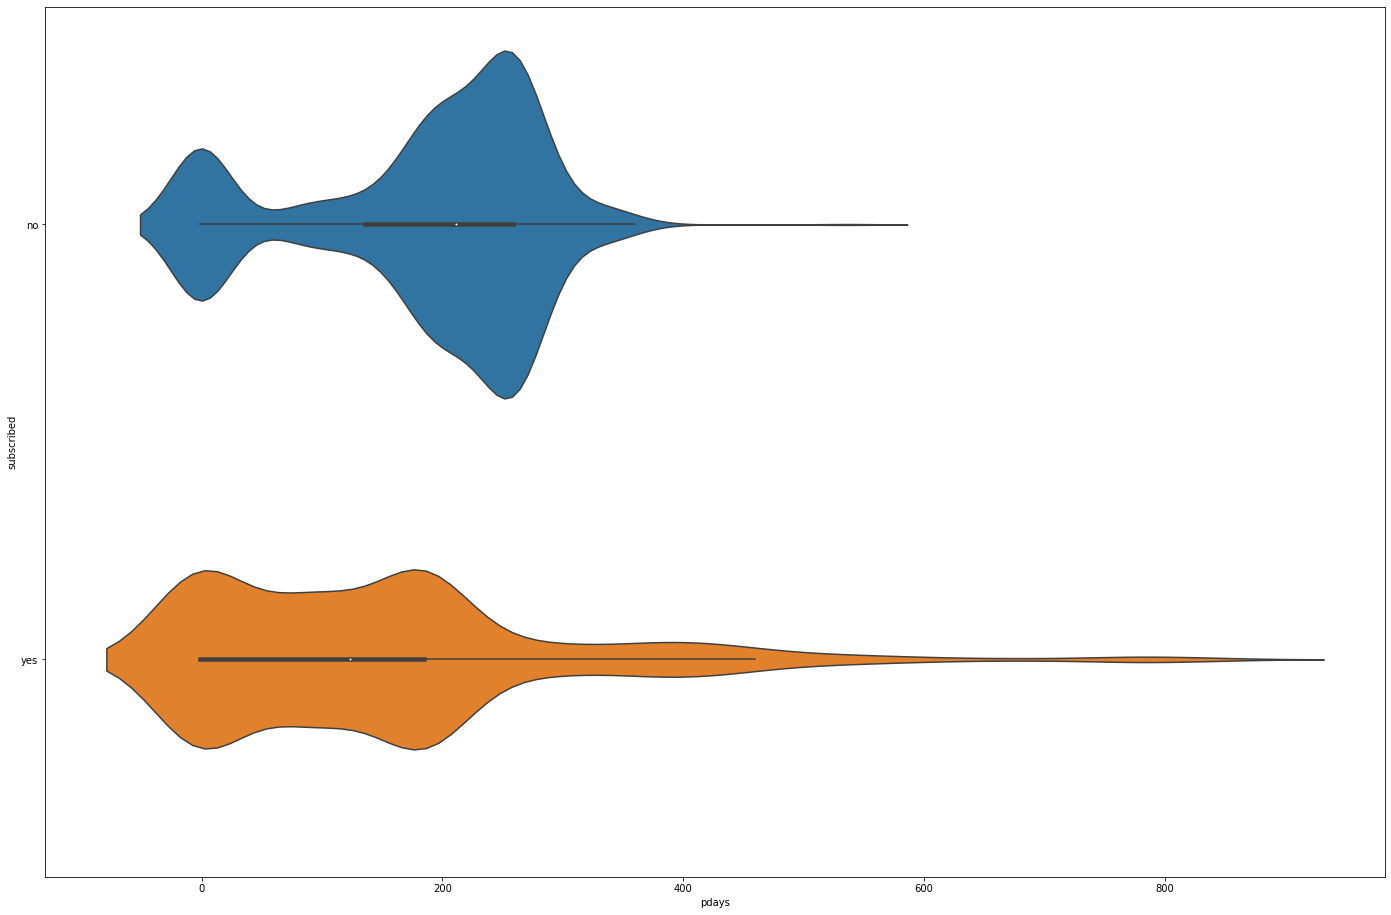

In [44]:
sns.violinplot(data=df, x='pdays', y='subscribed')
plt.show() 

- In average, the number of days that passed by after the client was last contacted from a previous campaign for subscribed person was almost 500 days. 
<br>
- In average, the number of days that passed by after the client was last contacted from a previous campaign for unsubscribed people was almost 400 days. 

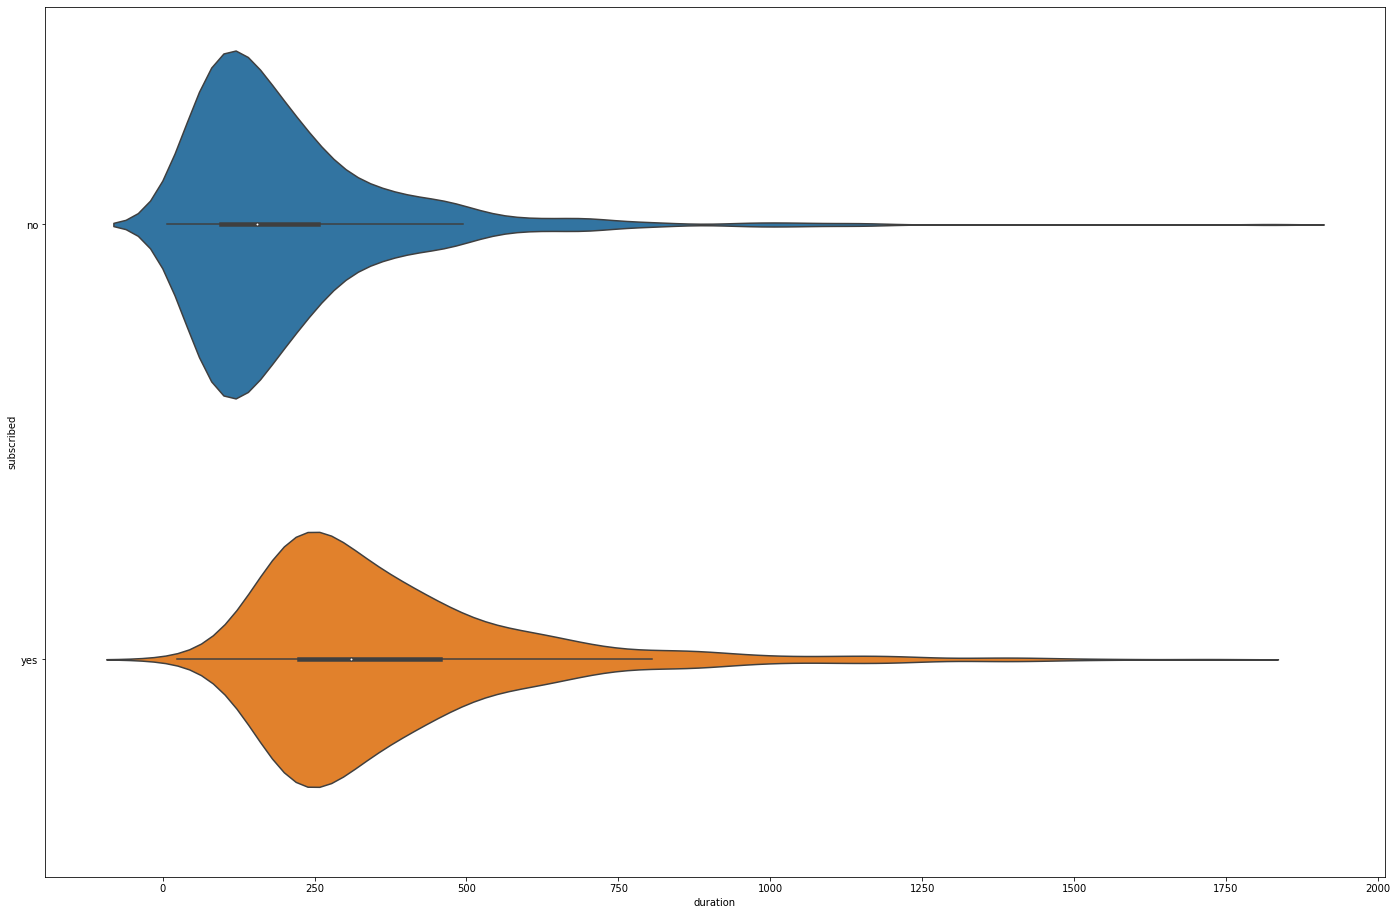

In [45]:
sns.violinplot(data=df, x='duration', y='subscribed')
plt.show() 

The mean of contact duration in seconds for subscribed people is slightly more (approx. 750 seconds) than for people that are not subscribed (approx. 500 seconds). 

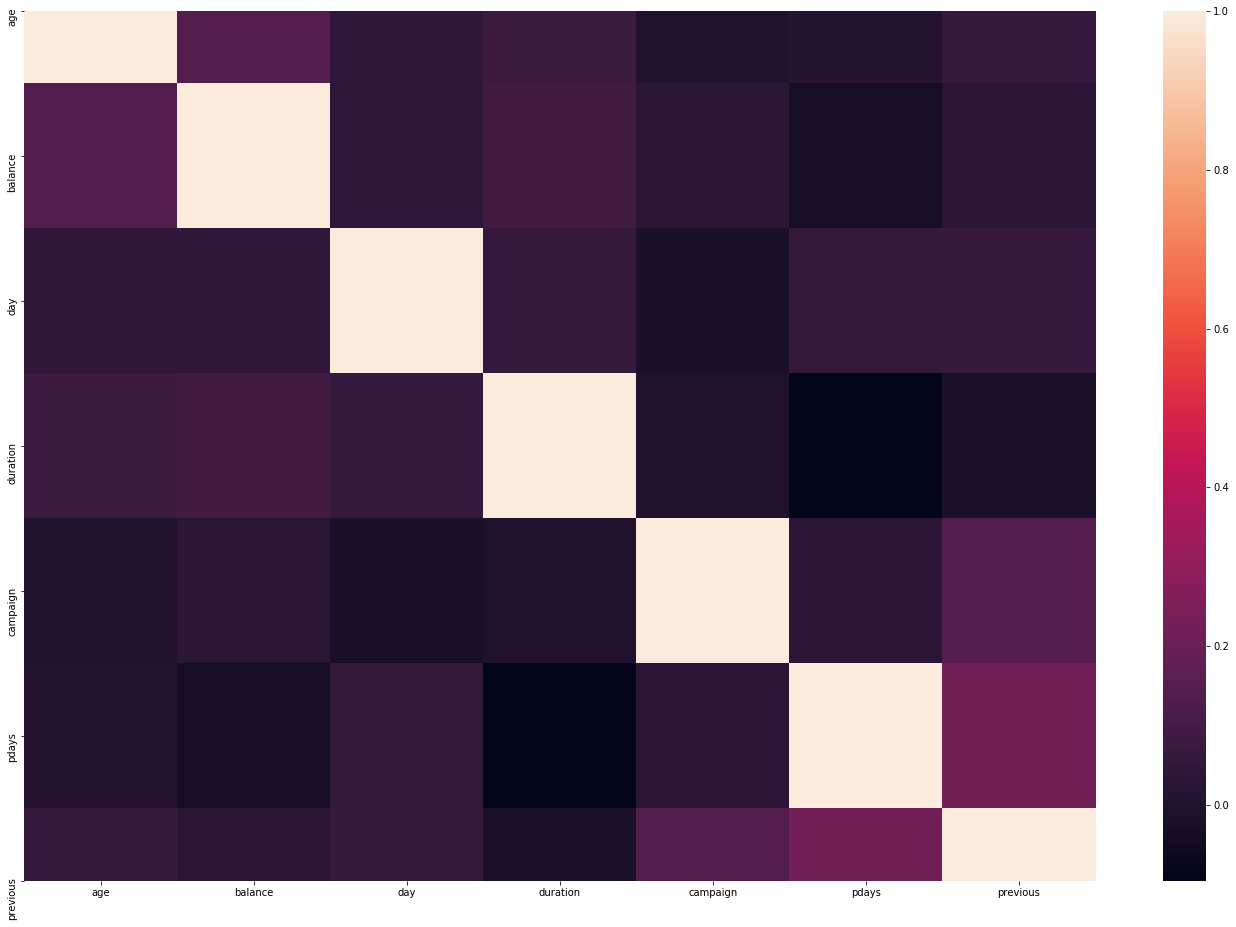

In [46]:
#correlation matrix
sns.heatmap(df.corr());

Obviously, the squares in the light colour (the diagonale) are correlating each variable to itself. Therefore, it is not surprisingly that there is a perfect correlation. 
<br>
<br>Otherwise, it surprises me that there is almost only dark colours and no light coulors. The only correlation of 0.3 I see is pdays and previous. But it is close to zero. Values closer to zero means there is no linear trend between the two variables. 

**Conclusion**

**Most frequent values**
<br>
- For job: management. 
- For marital: married. 
- For education: secondary. 
<br>

**Age Distribution**

- Most of the people were between late 20’s and 40 years of age.
<br>
- The ages of the various job groups are relatively consistent. Mostly the age is between 30 and 50. 
<br>
- For entrepreneurs and for housemaids the age is slightly different. Here the age is between 35 and 55.

**Balance Distribution**

- The ages of the older housemaids are closer together than the ages of the younger housemaids. 
<br>
- The the ages of the younger management people are closer together than the ages of the older management people.
<br>
- The ages of the younger service people are closer together than the ages of the older service people. 
<br>
- Entrepreneur, retirees, and students are almost distributed symmetrically.
<br>
- There is no difference between the mean balance of primary, secondary, and tertiary education.

**Highest standard variation**
<br>
- Balance has the highest standard variation. Therefore, the balance values are spread out over a wide range. 
<br>

**Most extreme balance** 
<br>
- The most extreme balance belongs to a client who is married and who has secondary education. 
<br>

**Positively skewed distribution** 
<br>
- Since the mean is greater than the median, I assume that the following attributes age, balance, day, duration, campaign, and previous have positively skewed frequency distribution.
<br>

**Negatively skewed distribution**
<br>
- Since the mean is less than the median, I assume that the following attribute pdays has negatively skewed frequency distribution. 
<br>

**Other discoveries** 
<br>
- There is no difference between the mean balance of primary, secondary, and tertiary education. But there are extreme values. There are clients with higher balances. 
<br>
- Most of the clients have been contacted once during the campaign. There are few outliers. 
<br>
- Clients with secondary education that have a housing loan have more even distribution of the balances than Clients  with tertiary and primary education that have a housing loan. 
<br>
- Clients with secondary education that doesn't have a personal loan have more even distribution of the balances than clients with tertiary and primary education. 
<br>
- Most of the clients have been contacted once during the campaign. 
<br>
- The mean of contact duration in seconds for subscribed people is slightly morethan for people that are not subscribed.
<br>
- In average, the number of days that passed by after the client was last contacted from a previous campaign for subscribed person was more than for unsubscribed people.
<br>
- Previous campaign was successful with people with subscriptions.
<br>
- Subscriptions were bought most frequently between June and October.
<br>
- No subscriptions were bought in January and February.